<a href="https://colab.research.google.com/github/deqiangwang123/3253-Machine-Learning/blob/main/Week4_k_mean_Clustering_DW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering


In [2]:
np.random.seed(42)

# K-means

## Generating clusters to show how K-means reproduce them

### Generating centers 

In [3]:
trueK = 7
colors = 'bgrykcm'
dim = 2
n = 250

trueCentroids = np.random.rand(trueK, dim)

In [4]:
print(trueCentroids)

[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]
 [0.05808361 0.86617615]
 [0.60111501 0.70807258]
 [0.02058449 0.96990985]
 [0.83244264 0.21233911]]


In [5]:
def plotfigure():
  plt.scatter(trueCentroids[:,0], trueCentroids[:,1], color=colors)
  plt.xlim(-0.1,1.1)
  plt.ylim(-0.1,1.1)
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


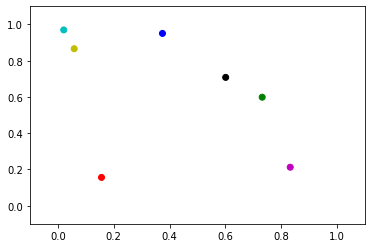

In [6]:
plotfigure()

### Generate synthetic datapoints around each others

In [15]:
sigma_xx = 0.001
sigma_xy = 0.001
XasList = []
X = trueCentroids

for c in trueCentroids:
    X_c = np.random.multivariate_normal(c,np.array([[sigma_xx*np.random.rand(),  sigma_xy*(2*np.random.rand()-1)], 
                                                    [sigma_xy*(2*np.random.rand()-1), sigma_xx*np.random.rand()]]), n) 
    XasList.append(X_c)
    X = np.append(X,X_c, axis=0)
np.random.shuffle(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  


In [16]:
X.shape

(1757, 2)

### Plot the points

In [12]:
def plotpoints():
  plt.figure(figsize=(10,5))
  for J in range(trueK):
    X_c = XasList[J]
    plt.scatter(X_c[:,0], X_c[:,1], c=colors[J], s=10)
    plt.title("Original Clusters")
    plt.xlim(-0.2,1.2)
    plt.ylim(-0.2,1.2)
    plt.axis('equal')


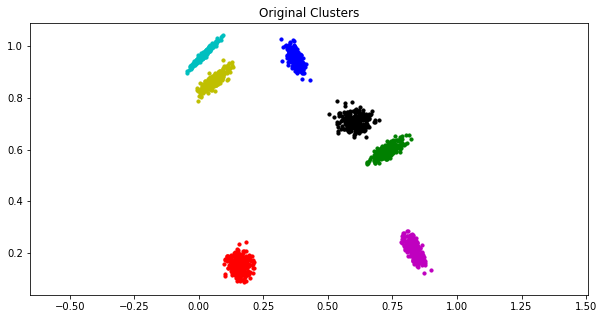

In [13]:
plotpoints()

## Cluster

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=trueK, random_state=42).fit(X)

In [21]:
np.unique(kmeans.labels_, return_index=True, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([ 5,  6,  2,  4, 10,  3,  0]),
 array([251, 251, 251, 250, 236, 252, 266]))

In [20]:
kmeans.labels_.shape

(1757,)

## Visualizing true and computed clusters

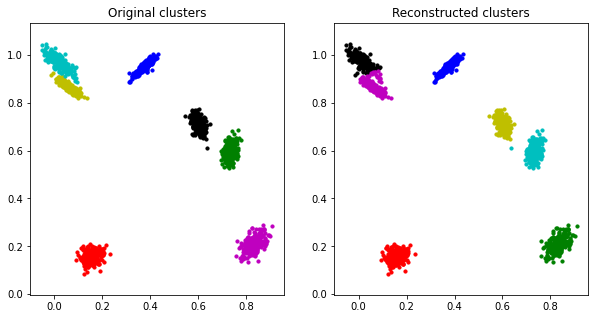

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
for J in range(trueK):
    X_c = XasList[J]
    plt.scatter(X_c[:, 0], X_c[:, 1], c=colors[J], s=10) 
    plt.title("Original clusters")
    plt.xlim(-0.2,1.2)
    plt.ylim(-0.2,1.2)
    plt.axis('equal')

plt.subplot(1,2,2)
for J in range(trueK):
  X_J = X[kmeans.labels_==J]
  plt.title("Reconstructed clusters")
  plt.scatter(X_J[:,0], X_J[:,1], c= colors[J], s=10)
  plt.xlim(-0.2,1.2)
  plt.ylim(-0.2,1.2)
  plt.axis('equal')
plt.show()

## Measure Clustering Performance

In [23]:
def getInertia(X, kmeans):
  inertia = 0
  for J in range(len(X)):
    inertia = inertia + np.linalg.norm(X[J] - kmeans.cluster_centers_[kmeans.labels_[J]])**2
  return inertia

In [31]:
def getInertia2(X,kmeans):
    ''' This function is analogous to getInertia, but with respect to the 2nd closest center, rather than closest one'''
    inertia2 = 0
    for J in range(len(X)):
        L = min(1,len(kmeans.cluster_centers_)-1) # this is just for the case where there is only 1 cluster at all
        dist_to_center = sorted([np.linalg.norm(X[J] - z)**2 for z in kmeans.cluster_centers_])[L]
        inertia2 = inertia2 + dist_to_center
    return inertia2   

In [32]:
# silhouette

inertias_1 = [] #empty list to store inertia 1
inertias_2 = [] #empty list to store inertia 2
silhouette_avgs = [] #empty list to store silhouette scores
max_K = trueK  #loop through this many K values and store the performance metrics for each K
for k in np.arange(1,max_K+1):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)  
    inertias_1 = inertias_1 + [kmeans.inertia_]
    inertias_2 = inertias_2 + [getInertia2(X,kmeans)]
    print(kmeans.inertia_, getInertia2(X,kmeans) ) #print inertia 1 and 2 for the current K

    if k>1:
        silhouette_avgs = silhouette_avgs + [silhouette_score(X, kmeans.labels_)]
        print("silhouette_score: ",silhouette_score(X, kmeans.labels_)) #print silhouette score for the current K

338.04436810859227 338.0443681085921
146.49618833134548 928.6512557551033
silhouette_score:  0.5547722978788443
63.569991477630445 781.5657256836672
silhouette_score:  0.6841072550696333
26.625833002968818 553.4865351633657
silhouette_score:  0.7544693400364296
7.2822145767456234 328.39547414939693
silhouette_score:  0.8106819902576802
3.5742988059961673 257.4047624223381
silhouette_score:  0.8271511952881734
2.0495116224790735 202.6105714280941
silhouette_score:  0.7794690474049076


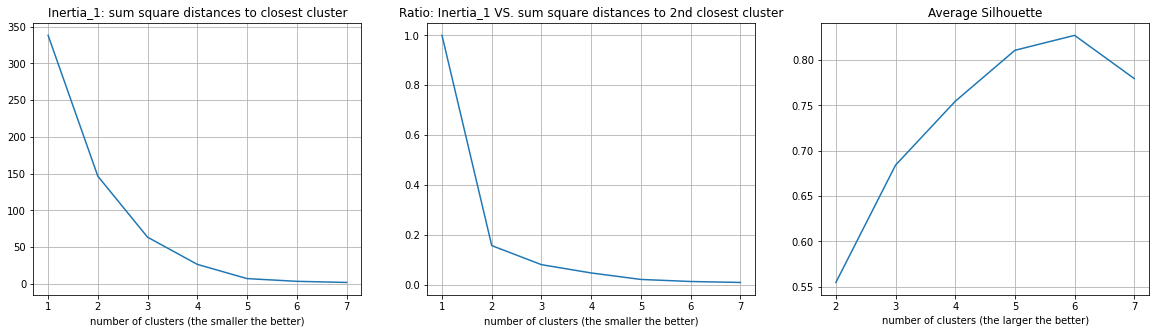

In [33]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title("Inertia_1: sum square distances to closest cluster")
plt.plot(np.arange(1,max_K+1),inertias_1)
plt.xticks(np.arange(1,max_K+1))
plt.xlabel('number of clusters (the smaller the better)')
plt.grid()
    
plt.subplot(1,3,2)    
plt.title("Ratio: Inertia_1 VS. sum square distances to 2nd closest cluster")
plt.plot(np.arange(1,max_K+1),np.array(inertias_1)/np.array(inertias_2))
plt.xticks(np.arange(1,max_K+1))
plt.xlabel('number of clusters (the smaller the better)')
plt.grid()

plt.subplot(1,3,3)  
plt.title("Average Silhouette")
plt.plot(np.arange(2,max_K+1), silhouette_avgs)
plt.xticks(np.arange(2,max_K+1))
plt.xlabel('number of clusters (the larger the better)')
plt.grid()

plt.show()

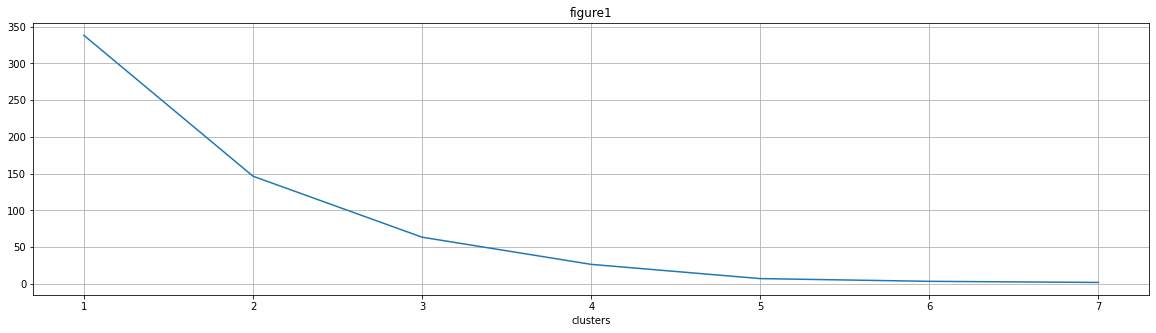

In [37]:
plt.figure(figsize=(20,5))
# plt.subplot(3,1,1)
plt.title("figure1")
plt.plot(np.arange(1, trueK+1), inertias_1)
plt.xticks(np.arange(1, trueK+1))
plt.xlabel("clusters")
plt.grid()
plt.show()

In [38]:
np.arange(1, trueK+1)

array([1, 2, 3, 4, 5, 6, 7])

In [39]:
np.arange(1, trueK)

array([1, 2, 3, 4, 5, 6])